In [5]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [6]:
df = pd.read_csv('C:\\Users\\ajroy\\OneDrive\\Desktop\\New folder\\loan_apporaval_model\\loan_cleaned.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:

# Step 3: Drop unnecessary ID column
from sklearn.calibration import LabelEncoder


df.drop('Loan_ID', axis=1, inplace=True)

# Step 4: Fill missing values if needed (important before encoding)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

# Step 5: Initialize LabelEncoder
le = LabelEncoder()

# Step 6: Apply Label Encoding to binary/small categorical columns
for col in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Status']:
    df[col] = le.fit_transform(df[col])

# Step 7: Apply One-Hot Encoding to multi-category columns
df = pd.get_dummies(df, columns=['Property_Area'], drop_first=True)

# Step 8: Check encoded data
print(df.head())

# Step 9: Save encoded data (optional)
df.to_csv("loan_data_encoded.csv", index=False)
print("✅ Encoded file saved as loan_data_encoded.csv")


   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        0           0          0              0             5849   
1       1        1           1          0              0             4583   
2       1        1           0          0              1             3000   
3       1        1           0          1              0             2583   
4       1        0           0          0              0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0       128.0             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

   Loan_Status  Property_Area_Semiurban  Property_Area_Urban  
0            1                    False              

C:\Users\ajroy\AppData\Local\Temp\ipykernel_2884\2859746061.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)
C:\Users\ajroy\AppData\Local\Temp\ipykernel_2884\2859746061.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [8]:
from sklearn.model_selection import train_test_split
# Separate features and target
X = df.drop('Loan_Status', axis=1)   # replace 'Loan_Status' with your target column name
y = df['Loan_Status']

# Split data — 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (491, 12)
Test shape: (123, 12)


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

# Separate features (X) and target (y)
X = df.drop(['Loan_Status', ], axis=1)
y = df['Loan_Status']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize model
tree_clf = DecisionTreeClassifier(random_state=42)

# Train the model
tree_clf.fit(X_train, y_train)

# Make predictions
y_pred = tree_clf.predict(X_test)

# Evaluate performance
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test F1 Score:", f1_score(y_test, y_pred))


Test Accuracy: 0.7154471544715447
Test F1 Score: 0.7904191616766467


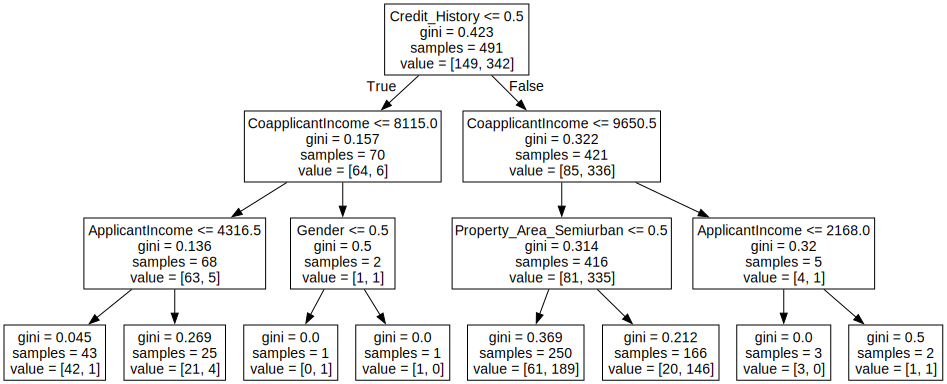

In [10]:
import graphviz 
from sklearn import tree

tree_clf = tree.DecisionTreeClassifier(max_depth = 3)
tree_clf.fit(X_train,y_train)
dot_data = tree.export_graphviz(tree_clf,feature_names = X.columns.tolist())
graph = graphviz.Source(dot_data)
graph


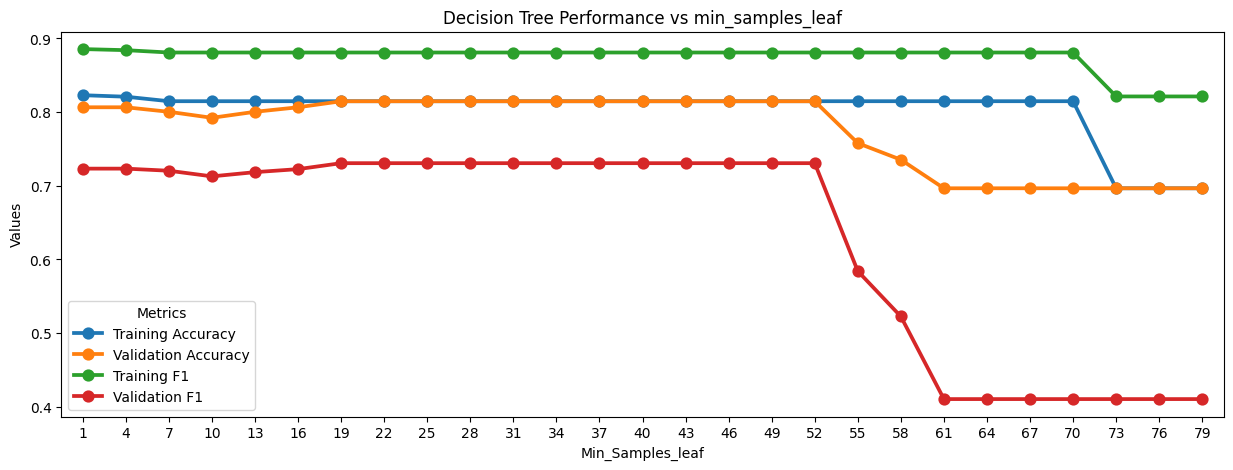

In [11]:
from sklearn.model_selection import cross_val_score


# 6️⃣ Lists to store results
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
min_samples_leaf = []

# 7️⃣ Loop to tune min_samples_leaf
for samples_leaf in range(1, 80, 3):
    tree_clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=samples_leaf, random_state=42)
    tree_clf.fit(X_train, y_train)
    
    y_train_pred = tree_clf.predict(X_train)
    
    training_acc = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    
    val_mean_f1 = cross_val_score(tree_clf, X_train, y_train, cv=5, scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(tree_clf, X_train, y_train, cv=5, scoring='accuracy').mean()
    
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    min_samples_leaf.append(samples_leaf)

# 8️⃣ Create DataFrame for results
Tuning_min_samples_leaf = {
    "Training Accuracy": training_accuracy,
    "Validation Accuracy": val_accuracy,
    "Training F1": training_f1,
    "Validation F1": val_f1,
    "Min_Samples_leaf": min_samples_leaf
}
Tuning_min_samples_leaf_df = pd.DataFrame(Tuning_min_samples_leaf)

# 9️⃣ Plot the tuning curve
plot_df = Tuning_min_samples_leaf_df.melt('Min_Samples_leaf', var_name='Metrics', value_name="Values")
plt.figure(figsize=(15, 5))
sns.pointplot(x="Min_Samples_leaf", y="Values", hue="Metrics", data=plot_df)
plt.title("Decision Tree Performance vs min_samples_leaf")
plt.show()


Let's use this Decision Tree classifier on unseen test data and evaluate Test Accuracy, F1 Score and Confusion Matrix

In [14]:
print(X_train.shape)
print(X_test.shape)


(491, 12)
(123, 12)


In [15]:
from sklearn.impute import SimpleImputer

# Create imputer (mean strategy for numeric data)
imputer = SimpleImputer(strategy='mean')

# Fit on training data and transform both train and test
X_train_imp = imputer.fit_transform(X_train)
X_test_imp = imputer.transform(X_test)

# Train model
tree_clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=35)
tree_clf.fit(X_train_imp, y_train)

# Predict
y_pred = tree_clf.predict(X_test_imp)

# Evaluate
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix on Test Data:")
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))


Test Accuracy: 0.7886178861788617
Test F1 Score: 0.8586956521739131
Confusion Matrix on Test Data:
Predicted   0    1  All
True                   
0          18   25   43
1           1   79   80
All        19  104  123


Model 2: Random Forest Classifier

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100,max_depth=3,min_samples_leaf = 10)
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_train)
print("Train F1 Score ", f1_score(y_train,y_pred))
print("Train Accuracy ", accuracy_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(rf_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(rf_clf,X_train,y_train,cv=5,scoring='accuracy').mean())


Train F1 Score  0.8807339449541285
Train Accuracy  0.814663951120163
Validation Mean F1 Score:  0.7235597279841174
Validation Mean Accuracy:  0.8004535147392289


Random Forest: Test Data Evaluation

In [17]:
y_pred = rf_clf.predict(X_test_imp)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)


Test Accuracy:  0.7886178861788617
Test F1 Score:  0.8586956521739131
Confusion Matrix on Test Data


c:\Users\ajroy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Predicted,0,1,All
True,,,
0,18,25,43
1,1,79,80
All,19,104,123


Model 3: Logistic RegressionModel 3: Logistic Regression

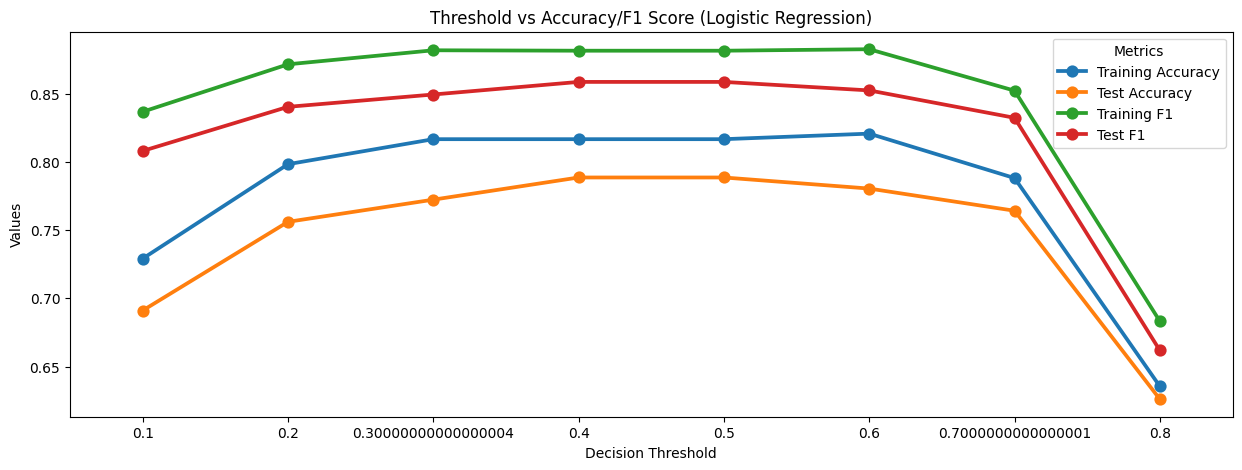

In [18]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.impute import SimpleImputer

# If your data has missing values, handle them first
imputer = SimpleImputer(strategy='mean')
X_train_imp = imputer.fit_transform(X_train)
X_test_imp = imputer.transform(X_test)

train_accuracies = []
train_f1_scores = []
test_accuracies = []
test_f1_scores = []
thresholds = []

# Sweep thresholds from 0.1 to 0.9
for thresh in np.arange(0.1, 0.9, 0.1):
    logreg_clf = LogisticRegression(solver='liblinear')
    logreg_clf.fit(X_train_imp, y_train)

    # Predictions on training data
    y_pred_train_thresh = logreg_clf.predict_proba(X_train_imp)[:, 1]
    y_pred_train = (y_pred_train_thresh > thresh).astype(int)
    
    train_acc = accuracy_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)

    # Predictions on test data
    y_pred_test_thresh = logreg_clf.predict_proba(X_test_imp)[:, 1]
    y_pred_test = (y_pred_test_thresh > thresh).astype(int)
    
    test_acc = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)

    # Store results
    train_accuracies.append(train_acc)
    train_f1_scores.append(train_f1)
    test_accuracies.append(test_acc)
    test_f1_scores.append(test_f1)
    thresholds.append(thresh)

# Create DataFrame
Threshold_logreg = {
    "Training Accuracy": train_accuracies,
    "Test Accuracy": test_accuracies,
    "Training F1": train_f1_scores,
    "Test F1": test_f1_scores,
    "Decision Threshold": thresholds
}

Threshold_logreg_df = pd.DataFrame.from_dict(Threshold_logreg)

# Plot
plot_df = Threshold_logreg_df.melt('Decision Threshold', var_name='Metrics', value_name="Values")
plt.figure(figsize=(15, 5))
sns.pointplot(x="Decision Threshold", y="Values", hue="Metrics", data=plot_df)
plt.title("Threshold vs Accuracy/F1 Score (Logistic Regression)")
plt.show()


Logistic Regression does slightly better than Decision Tree and Random Forest.
Based on the above Test/Train curves, we can keep threshold to 0.4.
Now Finally let's look at Logistic Regression Confusion Matrix



In [19]:
thresh = 0.4 ### Threshold chosen from above Curves
y_pred_test_thresh = logreg_clf.predict_proba(X_test_imp)[:,1]
y_pred = (y_pred_test_thresh > thresh).astype(int) 
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)


Test Accuracy:  0.7886178861788617
Test F1 Score:  0.8586956521739131
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,18,25,43
1,1,79,80
All,19,104,123
